# Sesión 05: Relaciones entre variables
Dificultad 😀😀😀 (regular)  
Uso de código: 🐍🐍 (poco)

## 5.1 Introducción
¿Cómo evaluar si dos variables cualitativas están relacionadas? Una forma inicial de explorar la relación entre dos variables cualitativas es mediante una tabla cruzada.  
Para la siguiente práctica utilizaremos el archivo "b03_enigh2020"

In [1]:
# Importa la biblioteca de pandas, numpy y matplotlib.pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga el archivo con la base de datos
df = pd.read_excel('data/b03_enigh2020.xlsx')

In [3]:
# Obtén las dimensiones de la base de datos
df.shape

(2332, 24)

In [4]:
# Explora la información básica de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    2332 non-null   int64  
 1   ubica_geo   2332 non-null   object 
 2   clave_mun   2332 non-null   int64  
 3   tam_loc     2332 non-null   int64  
 4   est_socio   2332 non-null   object 
 5   clase_hog   2332 non-null   object 
 6   sexo_jefe   2332 non-null   object 
 7   edad_jefe   2332 non-null   int64  
 8   educa_jefe  2332 non-null   int64  
 9   tot_integ   2332 non-null   int64  
 10  hombres     2332 non-null   int64  
 11  mujeres     2332 non-null   int64  
 12  p65mas      2332 non-null   int64  
 13  ing_cor     2332 non-null   float64
 14  gasto_mon   2332 non-null   float64
 15  alimentos   2332 non-null   float64
 16  cereales    2332 non-null   float64
 17  carnes      2332 non-null   float64
 18  leche       2332 non-null   float64
 19  huevo       2332 non-null  

# Obtén la estadística descriptiva
df.describe().T

## 5.2 Tabla cruzada

Una forma básica de realizar una tabla cruzada es mediante el método *crosstab* de Pandas, especificando las variables en las filas y columnas respectivamente. Por ejemplo, para las variables "A" y "B", utilizaremos:  
`pd.crosstab(df['A'], df['B'], margins=True)`
El argumento *margins* se puede agregar para mostrar la suma por fila o columna. Cada celda dentro de la tabla mostrará la frecuencia observada en esa intersección.  


Tabla cruzada / tabla de contingecia


In [49]:
tabla = pd.crosstab(df['sexo_jefe'], df['est_socio'])
tabla

est_socio,alto,bajo,medio_alto,medio_bajo
sexo_jefe,,,,
hombre,263,188,511,818
mujer,102,39,179,232


In [24]:
# Crea una tabla cruzada para relacionar "sexo_jefe" con "est_socio"
tabla_margins = pd.crosstab(df['sexo_jefe'], df['est_socio'],margins=True)
tabla_margins

est_socio,alto,bajo,medio_alto,medio_bajo,All
sexo_jefe,,,,,
hombre,263,188,511,818,1780
mujer,102,39,179,232,552
All,365,227,690,1050,2332


In [28]:
# Crea una tabla cruzada para relacionar "sexo_jefe" con "est_socio"
tabla = pd.crosstab(df['sexo_jefe'], df['est_socio'])
tabla

est_socio,bajo,medio_bajo,medio_alto,alto
sexo_jefe,,,,
mujer,39,232,179,102
hombre,188,818,511,263


En muchas ocasiones se requiere representar esta tabla cruzada mediante proporciones. Para ello se puede utilizar el argumento *normalize* con los siguientes valores:
- *'all'*: para divididr cada cantidad entre el total.
- *'index'*: para dividir las celdas en cada fila entre el total de la fila.
- *'columns'*: para dividir las celdas en cada columna entre el total de la columna.

In [21]:
# Modifica la tabla anterior para mostrar las cantidades *normalizadas* entre el total
tabla_all = pd.crosstab(df['sexo_jefe'], df['est_socio'], normalize='all')
tabla_all

est_socio,alto,bajo,medio_alto,medio_bajo
sexo_jefe,,,,
hombre,0.112779,0.080617,0.219125,0.350772
mujer,0.043739,0.016724,0.076758,0.099485


In [22]:
# Modifica la tabla anterior para mostrar las cantidades *normalizadas* entre el total
tabla_index = pd.crosstab(df['sexo_jefe'], df['est_socio'], normalize='index')
tabla_index

est_socio,alto,bajo,medio_alto,medio_bajo
sexo_jefe,,,,
hombre,0.147753,0.105618,0.287079,0.459551
mujer,0.184783,0.070652,0.324275,0.420290


In [23]:
# Modifica la tabla anterior para mostrar las cantidades *normalizadas* entre el total
tabla_columns = pd.crosstab(df['sexo_jefe'], df['est_socio'], normalize='columns')
tabla_columns

est_socio,alto,bajo,medio_alto,medio_bajo
sexo_jefe,,,,
hombre,0.720548,0.828194,0.74058,0.779048
mujer,0.279452,0.171806,0.25942,0.220952


Opcionalmente, si quieres modificar el orden de las filas o columnas puedes usar el módulo *Categorical* de Pandas, que convierte una columna de un dataframe en datos de tipo categórico, a los cuales se les puede dar un orden específico.

In [26]:
orden_sexo = ['mujer', 'hombre']
orden_estrato = ['bajo', 'medio_bajo', 'medio_alto', 'alto']
df['sexo_jefe']=pd.Categorical(df['sexo_jefe'], categories=orden_sexo, ordered=True)
df['est_socio']=pd.Categorical(df['est_socio'], categories=orden_estrato, ordered=True)

## 5.3 Prueba Chi cuadrada
Para evaluar la dependencia o independencia entre dos variables cualitativas se puede utilizar la prueba Chi cuadrada. Las hipótesis son:
- Hipótesis nula (H0): No existe dependencia entre ambas variables (son independientes).
- Hipótesis alternativa (H1): Existe dependencia entre ambas variables.


Para realizar la prueba Chi cuadrada necesitamos importar la biblioteca *scipy.stats*


- A y b son independientes

In [29]:
import numpy as np
from scipy.stats import chi2_contingency

Un ejemplo de la aplicación a una tabla de contingencia es:  
`chi2, p, dof, expected = chi2_contingency(tabla)`  
Esta instrucción arrojará  los siguientes resultados:
- El estadístico de prueba
- El p-valor
- Los grados de libertad
- La tabla de frecuencias esperadas
Para imprimir estos resultados:  
```
print('Estadístico de prueba:', chi2) 
print('Valor p:', p)  
print('Grados de libertad:', dof)  
print('Tabla de frecuencias esperadas')   
print(expected)
```


In [30]:
# Realiza una prueba chi cuadrada a la tabla obtenida
chi2, p, dof, expected = chi2_contingency(tabla)

In [40]:
print('Estadístico de prueba \t', chi2) 
print('Valor p \t \t', p)  
print('Grados de libertad \t', dof)  
print('\n Tabla de frecuencias esperadas:')   
print(expected)

Estadístico de prueba 	 12.395857313087394
Valor p 	 	 0.006143128316573984
Grados de libertad 	 3

 Tabla de frecuencias esperadas:
[[ 53.73241852 248.54202401 163.32761578  86.39794168]
 [173.26758148 801.45797599 526.67238422 278.60205832]]


In [41]:
alfa = 0.05
if p <=alfa:
    print('Las variables son dependientes (Se rechaza la hipótesis nula)')
else:
    print('Las variables son independientes (No se rechaza la hipótesis nula)')

Las variables son dependientes (Se rechaza la hipótesis nula)


Para visualizar la relación entre ambas variables se puede utilizar un "mapa de calor". Es recomendable utilizar la librería *seaborn* como en el siguiente ejemplo:
`ax = sns.heatmap(tabla, annot=True, cmap='YlGnBu', fmt='d')`
*annot=True* sirve para indicar la cantidad en cada celda, *fmt=d* se utiliza para que se despliegue como números enteros, y *cmap* se utiliza para seleccionar una paleta de colores (ver https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [42]:
import seaborn as sns

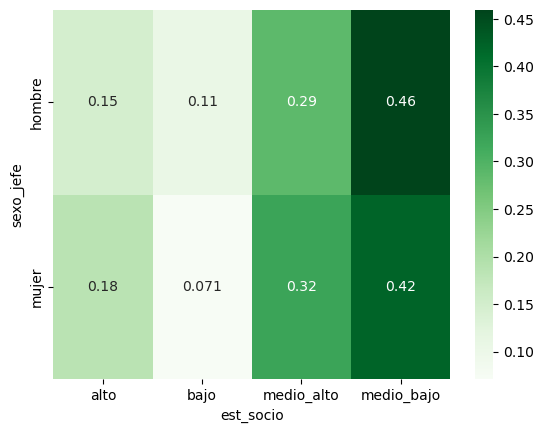

In [50]:
ax = sns.heatmap(tabla_index, annot=True, cmap='Greens')

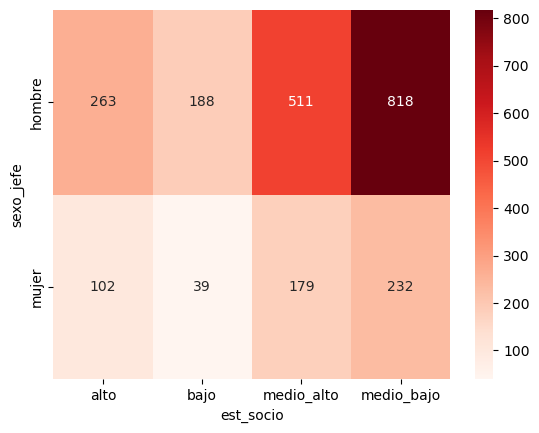

In [52]:
ax = sns.heatmap(tabla, annot=True, cmap='Reds', fmt='d')

## 5.4 Análisis de correspondencia múltiple

El análisis de correspondencia múltiple permite observar la relación entre las categorías de diferentes variables cualitativas. Para realizar el análisis de correspondencia se recomienda instalar la biblioteca *Prince* (solo es necesario hacerlo la primera vez) 
`pip install prince`  
La documentación se puede consultar en: documentación https://libraries.io/pypi/prince

In [59]:
# Instalar la biblioteca Prince
!pip install prince

  Obtaining dependency information for prince from https://files.pythonhosted.org/packages/ea/47/05a78e27a6c7f85b5e006169e4ddf27637867124ef841176f5e4f5ce7f88/prince-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6.0.0,>=4.2.2 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/415.6 kB ? eta -:--:--
    --------------------------------------- 10.2/415.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/415.6 kB 660.6 kB/s eta 0:00:01
   ----------------------------- ---------- 307.2/415.6 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 415.6/415.6 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/996.9 kB ? eta -:--:--
   ----------------------------------- --- 901.1/996.9 kB 28.7 MB/s eta 0:00:01
   --------------------------------------- 996.9/996.9 kB

In [62]:
import prince

Seleccionamos un conjunto de variables cualitativas

In [63]:
var_cat = ['est_socio', 'sexo_jefe', 'ubica_geo']

In [65]:
# Creación de instancia del modelo
mca = prince.MCA(n_components = 2)
# Ajuste del modelo a los datos
mca = mca.fit(df[var_cat])
# Crea gráfico
ax = mca.plot(df[var_cat], show_column_labels=True, show_row_markers=False)
ax

alt.LayerChart(...)

Cada punto corresponde a una observación o una categoría. La interpretación de las dimensiones depende del contexto. En general, la distancia entre los puntos de cada categoría indican la relación entre ellas. Entre más corta sea la distancia, mayor será la asociación de las categorías. Observaciones y categorías en el mismo cuadrante tienden a tener relaciones más fuertes, mientras que observaciones y categorías en cuatrantes opuestos pueden representar relaciones negativas. Una categoría cerca del centro generalmente indica que esa categoría no está fuertemente asociada con ninguna de las dimensiones, por ejemplo, por ser independiente, tener baja variabilidad o baja frecuencia.


## 5.4 Análisis de correlación

Para calcular un coeficiente de correlación de Pearson entre dos columnas se puede utilizar el método *corr()* de Pandas. Por ejemplo:
`correlacion = df['X'].corr(df['Y'])`  
Para calcular el coeficiente de correlación de Spearman (*¿cuándo se recomienda utilizarlo?*) se puede agregar como argumento:  
`correlacion = df['X'].corr(df['Y'], method='spearman')`  

In [67]:
# Calcula la correlación entre "ing_cor" y "gasto_mon"
correlacion = df['ing_cor'].corr(df['gasto_mon'])
correlacion

0.6183850511096656

Otra opción para calcular el coeficiente de correlación es mediante la biblioteca *scipy.stats* con la ventaja de que se puede obtener el valor p. Para ello se puede usar:  
`corr_coef, p_valor = pearsonr(df['X'], df['Y'])`

In [68]:
from scipy.stats import pearsonr

In [71]:
corr_coef, p_valor = pearsonr(df['ing_cor'], df['gasto_mon'])
print('Correlacion \t', corr_coef)
print('P-valor \t', p_valor)

Correlacion 	 0.6183850511096658
P-valor 	 3.9864606022504336e-246


In [74]:
var_cont = ["ing_cor", "gasto_mon", "edad_jefe", "tot_integ"]

Para obtener una matriz de correlaciones a partir de una lista de columnas:  
`matriz_corr = df[columnas].corr()`

In [75]:
# Obtén la matriz de correlaciones
matriz_corr = df[var_cont].corr()
matriz_corr

,ing_cor,gasto_mon,edad_jefe,tot_integ
ing_cor,1.000000,0.618385,0.031953,0.135281
gasto_mon,0.618385,1.000000,-0.054339,0.168204
edad_jefe,0.031953,-0.054339,1.000000,-0.158874
tot_integ,0.135281,0.168204,-0.158874,1.000000


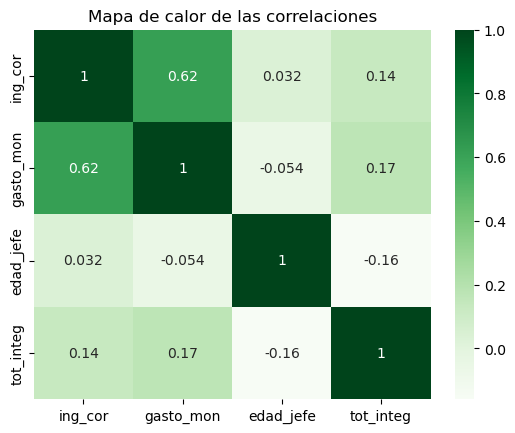

In [76]:
ax = sns.heatmap(matriz_corr, annot=True, cmap='Greens')
ax.set_title('Mapa de calor de las correlaciones');

## 5.5 Escalamiento multidimensional

In [77]:
from sklearn.manifold import MDS

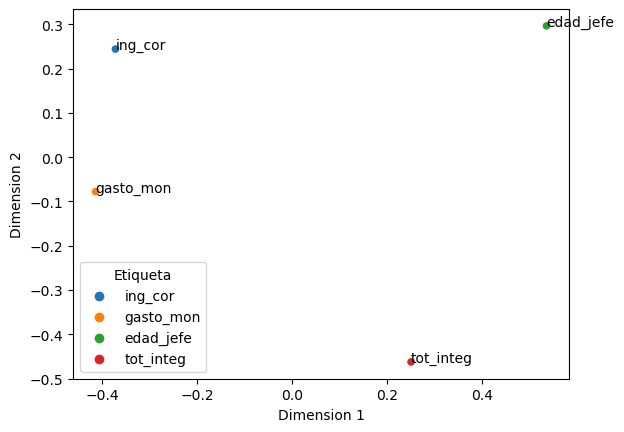

In [78]:
# Calcular distancias
distancias = 1-np.abs(matriz_corr)
# Aplicar modelo
mds = MDS(n_components=2, dissimilarity='precomputed', normalized_stress='auto')
mds_resultados = mds.fit_transform(distancias)
# Convertir resultados a dataframe
mds_df = pd.DataFrame(mds_resultados, columns=['Dimension 1', 'Dimension 2'])
mds_df['Etiqueta']=var_cont
#Visualización
sns.scatterplot(data=mds_df, hue='Etiqueta', x='Dimension 1', y='Dimension 2')
# Agregar etiquetas a cada punto
for i in range(len(mds_df)):
    plt.text(mds_df['Dimension 1'][i], mds_df['Dimension 2'][i], mds_df['Etiqueta'][i])
plt.show()